### **Phase 2: Ball Tracking and Player Statistics with DEEPSORT** 🎥⚽


1. **Player & Ball Tracking** ⚽

In [1]:
# test with cli command
!yolo track model="/Users/alyazouzou/Desktop/CV_Football/FootCVision/phase1/runs/detect/train/weights/best.pt" source="/Users/alyazouzou/Desktop/CV_Football/vids/good.mov" conf=0.3 iou=0.5 show

Ultralytics 8.3.57 🚀 Python-3.9.21 torch-2.5.1 CPU (Apple M3)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

video 1/1 (frame 1/4159) /Users/alyazouzou/Desktop/CV_Football/vids/good.mov: 384x640 1 ball, 8 players, 66.3ms
2025-02-02 11:32:24.688 python[61450:5603506] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-02 11:32:24.688 python[61450:5603506] +[IMKInputSession subclass]: chose IMKInputSession_Modern
video 1/1 (frame 2/4159) /Users/alyazouzou/Desktop/CV_Football/vids/good.mov: 384x640 1 ball, 7 players, 62.4ms
video 1/1 (frame 3/4159) /Users/alyazouzou/Desktop/CV_Football/vids/good.mov: 384x640 1 ball, 8 players, 55.7ms
video 1/1 (frame 4/4159) /Users/alyazouzou/Desktop/CV_Football/vids/good.mov: 384x640 1 ball, 8 players, 66.3ms
video 1/1 (frame 5/4159) /Users/alyazouzou/Desktop/CV_Football/vids/good.mov: 384x640 1 ball, 8 players, 59.5ms
video 1/1 (frame 6/4159) /Users/alyazouzou/Desktop/CV_Football/vids/good.mov: 384x640 1 ball, 8 p

In [1]:
import cv2
from track import PlayerTracker

In [2]:
video_path = "/Users/alyazouzou/Desktop/CV_Football/vids/good.mov"
tracker = PlayerTracker(video_path)
final_df = tracker.track()


0: 384x640 1 ball, 10 players, 66.0ms
Speed: 1.7ms preprocess, 66.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 53.8ms
Speed: 1.0ms preprocess, 53.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 57.4ms
Speed: 0.9ms preprocess, 57.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 58.8ms
Speed: 1.0ms preprocess, 58.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 63.2ms
Speed: 1.2ms preprocess, 63.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 61.6ms
Speed: 1.0ms preprocess, 61.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 54.6ms
Speed: 1.0ms preprocess, 54.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 54.4ms
Speed: 1.

/Users/alyazouzou/Desktop/CV_Football/FootCVision/phase2/track.py:153: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_full[col].fillna(method='ffill', inplace=True)
/Users/alyazouzou/Desktop/CV_Football/FootCVision/phase2/track.py:153: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_full[col].fillna(method='ffill', inplace=True)
/Users/alyazouzou/Desktop/CV_Football/FootCVision/phase2/track.py:154: FutureWarning: A value is trying to be

In [3]:
tracker.plot_tracking(final_df)

other

   frame  track_id class            x           y          w          h
0     28         7  ball  1416.514160  442.960693  22.254639  32.427734
1     29         7  ball  1416.510986  442.933411  22.433594  32.571747
2     30         7  ball  1418.606323  443.216187  23.583008  33.957123
3     31         7  ball  1419.405518  443.312042  24.122803  34.477661
4     32        21  ball   849.776001  353.104523  19.765137  25.068726
5     33        22  ball   779.088196  342.043793  19.592773  26.559387
6     34        22  ball   779.074890  342.041565  19.550171  26.501862
7     35        23  ball   732.675049  336.095825  17.803040  27.132660
8     36        23  ball   732.681519  336.091522  17.806641  27.138916
9     37        24  ball   705.837524  329.290558  17.850281  25.142212


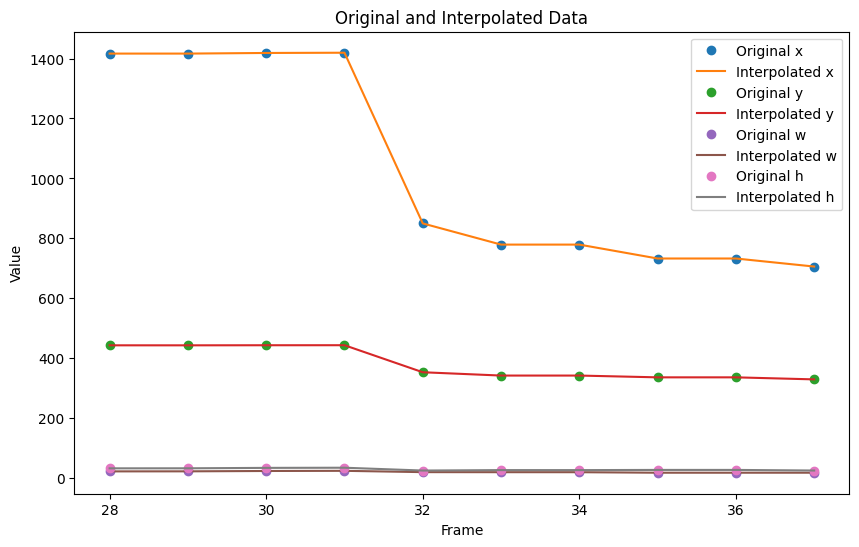

In [3]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Sample data
data = {
    'frame': [28, 29, 30, 31, 32, 33, 34, 35, 36, 37],
    'track_id': [7, 7, 7, 7, 21, 22, 22, 23, 23, 24],
    'class': ['ball'] * 10,
    'x': [1416.51416015625, 1416.510986328125, 1418.6063232421875, 1419.405517578125, 849.7760009765625, 779.0881958007812, 779.0748901367188, 732.675048828125, 732.6815185546875, 705.8375244140625],
    'y': [442.960693359375, 442.93341064453125, 443.2161865234375, 443.3120422363281, 353.1045227050781, 342.0437927246094, 342.04156494140625, 336.0958251953125, 336.0915222167969, 329.2905578613281],
    'w': [22.254638671875, 22.43359375, 23.5830078125, 24.122802734375, 19.76513671875, 19.5927734375, 19.5501708984375, 17.80303955078125, 17.806640625, 17.85028076171875],
    'h': [32.427734375, 32.571746826171875, 33.957122802734375, 34.4776611328125, 25.0687255859375, 26.55938720703125, 26.501861572265625, 27.132659912109375, 27.138916015625, 25.1422119140625]
}

# Create DataFrame
df = pd.DataFrame(data)

# Interpolation function
def interpolate_data(df):
    interpolated_data = df.copy()
    for col in ['x', 'y', 'w', 'h']:
        f = interp1d(df['frame'], df[col], kind='linear', fill_value="extrapolate")
        interpolated_data[col] = f(df['frame'])
    return interpolated_data

# Perform interpolation
interpolated_df = interpolate_data(df)

# Print interpolated data
print(interpolated_df)

# Plot the original and interpolated data for visualization
plt.figure(figsize=(10, 6))
for col in ['x', 'y', 'w', 'h']:
    plt.plot(df['frame'], df[col], 'o', label=f'Original {col}')
    plt.plot(interpolated_df['frame'], interpolated_df[col], '-', label=f'Interpolated {col}')
plt.xlabel('Frame')
plt.ylabel('Value')
plt.legend()
plt.title('Original and Interpolated Data')
plt.show()

In [ ]:
import cv2
import pandas as pd

# Load the CSV data
csv_file = '/Users/alyazouzou/Desktop/CV_Football/FootCVision/phase2/test.csv'
df = pd.read_csv(csv_file)

# Get the first frame data
first_frame_data = df[df['frame'] == 1]

# Load the video
video_path = '/Users/alyazouzou/Desktop/CV_Football/vids/good.mov'
cap = cv2.VideoCapture(video_path)

# Read the first frame
success, frame = cap.read()
if not success:
    print("Failed to read the video")
    cap.release()
    exit()

# Get frame dimensions
height, width, _ = frame.shape

# Plot the bounding boxes on the first frame
for _, row in first_frame_data.iterrows():
    x_center = row['x']
    y_center = row['y']
    box_width = row['w']
    box_height = row['h']
    class_name = row['class']

    # Calculate top-left and bottom-right coordinates of the bounding box
    x_min = int(x_center - box_width / 2)
    y_min = int(y_center - box_height / 2)
    x_max = int(x_center + box_width / 2)
    y_max = int(y_center + box_height / 2)

    # Choose a color for the bounding box
    color = (0, 255, 0) if class_name == "ball" else (255, 0, 0)

    # Draw the bounding box
    cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), color, 2)
    cv2.putText(frame, class_name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Display the frame with bounding boxes
cv2.imshow('First Frame with Bounding Boxes', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Release the video capture object
cap.release()

2025-02-02 13:59:38.708 python[62835:5658329] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-02 13:59:38.708 python[62835:5658329] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [10]:
import cv2
import pandas as pd

# Load the CSV data
csv_file = '/Users/alyazouzou/Desktop/CV_Football/FootCVision/phase2/test.csv'
df = pd.read_csv(csv_file)

# Load the video
video_path = '/Users/alyazouzou/Desktop/CV_Football/vids/good.mov'
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

frame_number = 0

while cap.isOpened() and frame_number < 1000:
    success, frame = cap.read()
    if not success:
        break

    frame_number += 1

    # Get the tracking data for the current frame
    frame_data = df[df['frame'] == frame_number]

    for _, row in frame_data.iterrows():
        x_center = row['x']
        y_center = row['y']
        box_width = row['w']
        box_height = row['h']
        class_name = row['class']

        # Calculate top-left and bottom-right coordinates of the bounding box
        x_min = int(x_center - box_width / 2)
        y_min = int(y_center - box_height / 2)
        x_max = int(x_center + box_width / 2)
        y_max = int(y_center + box_height / 2)

        # Choose a color for the bounding box
        color = (0, 255, 0) if class_name == "ball" else (255, 0, 0)

        # Draw the bounding box
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), color, 2)
        cv2.putText(frame, class_name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Write the frame to the output video
    out.write(frame)

# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()

In [6]:
import cv2
import numpy as np
import pandas as pd
from collections import defaultdict
from ultralytics import YOLO
from scipy.interpolate import interp1d

video_path = "/Users/alyazouzou/Desktop/CV_Football/vids/good.mov"  # Replace with your actual video path
path = "/Users/alyazouzou/Desktop/CV_Football/FootCVision/phase1/runs/detect/train/weights/best.pt"

# Load the YOLO model
model = YOLO(path)
cap = cv2.VideoCapture(video_path)

# To store tracking information
track_history = defaultdict(lambda: [])
ball_tracking_data = []  # List to store tracking data for 'ball'
player_tracking_data = []  # List to store tracking data for 'player'

frame_number = 0  # Initialize frame number counter

# Class labels for the specific task
class_labels = {0: "ball", 1: "goalkeeper", 2: "player", 3: "referee"}

while cap.isOpened():
    success, frame = cap.read()
    if success:
        # Get the dimensions of the frame (image width and height)
        image_height, image_width, _ = frame.shape
        
        # Increment frame number
        frame_number += 1

        # Track objects
        results = model.track(frame, persist=True, tracker="bytetrack.yaml")
        boxes = results[0].boxes.xywh.cpu()
        track_ids = results[0].boxes.id.int().cpu().tolist()
        classes = results[0].boxes.cls.int().cpu().tolist()  # Get class labels for each box

        for box, track_id, class_id in zip(boxes, track_ids, classes):
            if class_id == 0:  # "ball" class
                x, y, w, h = box
                # Convert xywh to normalized bounding box coordinates (x1, y1, x2, y2)
                x1, y1, x2, y2 = x / image_width, y / image_height, (x + w) / image_width, (y + h) / image_height
                
                # Track history for each object
                track = track_history[track_id]
                track.append((float(x1), float(y1), float(x2), float(y2)))

                # Only keep the last 30 points for tracking
                if len(track) > 30:
                    track.pop(0)

                # Store the tracking data for each object in the ball DataFrame
                for point in track:
                    ball_tracking_data.append({
                        "frame": frame_number,
                        "track_id": track_id,
                        "class": "ball",
                        "x1": point[0],
                        "y1": point[1],
                        "x2": point[2],
                        "y2": point[3]
                    })
            
            elif class_id == 2:  # "player" class
                x, y, w, h = box
                # Convert xywh to normalized bounding box coordinates (x1, y1, x2, y2)
                x1, y1, x2, y2 = x / image_width, y / image_height, (x + w) / image_width, (y + h) / image_height
                
                # Track history for each object
                track = track_history[track_id]
                track.append((float(x1), float(y1), float(x2), float(y2)))

                # Only keep the last 30 points for tracking
                if len(track) > 30:
                    track.pop(0)

                # Store the tracking data for each object in the player DataFrame
                for point in track:
                    player_tracking_data.append({
                        "frame": frame_number,
                        "track_id": track_id,
                        "class": "player",
                        "x1": point[0],
                        "y1": point[1],
                        "x2": point[2],
                        "y2": point[3]
                    })

    else:
        break

# Release the video capture
cap.release()



0: 384x640 1 ball, 10 players, 68.3ms
Speed: 1.6ms preprocess, 68.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 57.7ms
Speed: 1.0ms preprocess, 57.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 51.8ms
Speed: 0.9ms preprocess, 51.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 51.6ms
Speed: 1.0ms preprocess, 51.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 54.9ms
Speed: 0.9ms preprocess, 54.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 52.6ms
Speed: 1.0ms preprocess, 52.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 54.7ms
Speed: 1.1ms preprocess, 54.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 10 players, 51.6ms
Speed: 1.

In [7]:
# Create DataFrame from the tracking data for both classes
ball_df = pd.DataFrame(ball_tracking_data)
player_df = pd.DataFrame(player_tracking_data)

In [8]:
print(player_df)

         frame  track_id   class        x1        y1        x2        y2
0            1         1  player  0.116284  0.606754  0.146606  0.719140
1            1         2  player  0.402005  0.764672  0.427060  0.905499
2            1         3  player  0.919284  0.764142  0.957300  0.906539
3            1         4  player  0.215318  0.580553  0.239379  0.699313
4            1         5  player  0.201462  0.388025  0.227290  0.471792
...        ...       ...     ...       ...       ...       ...       ...
1553324   4133      1346  player  0.238111  0.528180  0.267487  0.621445
1553325   4133      1346  player  0.236865  0.528639  0.265687  0.622204
1553326   4133      1346  player  0.236488  0.530829  0.265402  0.625478
1553327   4133      1346  player  0.236394  0.531615  0.265212  0.626665
1553328   4133      1557  player  0.278969  0.510098  0.300515  0.591790

[1553329 rows x 7 columns]


In [9]:
# Find the range of frames
min_frame = ball_df['frame'].min()
max_frame = ball_df['frame'].max()

# Create a DataFrame with all frames in the range
all_frames = pd.DataFrame({'frame': range(min_frame, max_frame + 1)})

# Merge with the original DataFrame to include all frames
ball_df_full = pd.merge(all_frames, ball_df, on='frame', how='left')

# Interpolate the missing values for x1, y1, x2, y2
for col in ['x1', 'y1', 'x2', 'y2']:
    missing = ball_df_full[col].isna()
    df_training = ball_df_full[~missing]
    df_missing = ball_df_full[missing].reset_index(drop=True)
    
    if not df_training.empty:
        f = interp1d(df_training['frame'], df_training[col], fill_value="extrapolate")
        ball_df_full.loc[missing, col] = f(df_missing['frame'])

# Fill the 'class' and 'track_id' columns with the previous values
ball_df_full['class'] = ball_df_full['class'].ffill()
missing_track_id = ball_df_full['track_id'].isna()

# Fill NaN track_id with the previous track_id + 1
for idx in ball_df_full[missing_track_id].index:
    ball_df_full.loc[idx, 'track_id'] = ball_df_full.loc[idx - 1, 'track_id'] + 1
print(ball_df_full)

       frame  track_id class        x1        y1        x2        y2
0          1       7.0  ball  0.742772  0.421177  0.752213  0.447495
1          2       7.0  ball  0.742772  0.421177  0.752213  0.447495
2          2       7.0  ball  0.742538  0.420941  0.751780  0.446675
3          3       7.0  ball  0.742772  0.421177  0.752213  0.447495
4          3       7.0  ball  0.742538  0.420941  0.751780  0.446675
...      ...       ...   ...       ...       ...       ...       ...
26365   4133    1542.0  ball  0.183854  0.610593  0.193291  0.635324
26366   4133    1542.0  ball  0.184725  0.608586  0.194028  0.632864
26367   4133    1542.0  ball  0.185027  0.607896  0.194307  0.632022
26368   4133    1542.0  ball  0.186283  0.605882  0.195858  0.630516
26369   4133    1542.0  ball  0.186724  0.605178  0.196467  0.630008

[26370 rows x 7 columns]


In [10]:
# Find the range of frames
min_frame = player_df['frame'].min()
max_frame = player_df['frame'].max()

# Create a DataFrame with all frames in the range
all_frames = pd.DataFrame({'frame': range(min_frame, max_frame + 1)})

# Merge with the original DataFrame to include all frames
player_df_full = pd.merge(all_frames, player_df, on='frame', how='left')

# Interpolate the missing values for x1, y1, x2, y2
for col in ['x1', 'y1', 'x2', 'y2']:
    missing = player_df_full[col].isna()
    df_training = player_df_full[~missing]
    df_missing = player_df_full[missing].reset_index(drop=True)
    
    if not df_training.empty:
        f = interp1d(df_training['frame'], df_training[col], fill_value="extrapolate")
        player_df_full.loc[missing, col] = f(df_missing['frame'])

# Fill the 'class' and 'track_id' columns with the previous values
player_df_full['class'] = player_df_full['class'].ffill()
missing_track_id = player_df_full['track_id'].isna()

for idx in player_df_full[missing_track_id].index:
    if idx == 0:
        # If it's the first index, initialize track_id to 1 (or any other appropriate value)
        player_df_full.loc[idx, 'track_id'] = 1
    else:
        # For other rows, fill track_id with the previous track_id + 1
        player_df_full.loc[idx, 'track_id'] = player_df_full.loc[idx - 1, 'track_id'] + 1
print(player_df_full)

         frame  track_id   class        x1        y1        x2        y2
0            1         1  player  0.116284  0.606754  0.146606  0.719140
1            1         2  player  0.402005  0.764672  0.427060  0.905499
2            1         3  player  0.919284  0.764142  0.957300  0.906539
3            1         4  player  0.215318  0.580553  0.239379  0.699313
4            1         5  player  0.201462  0.388025  0.227290  0.471792
...        ...       ...     ...       ...       ...       ...       ...
1553324   4133      1346  player  0.238111  0.528180  0.267487  0.621445
1553325   4133      1346  player  0.236865  0.528639  0.265687  0.622204
1553326   4133      1346  player  0.236488  0.530829  0.265402  0.625478
1553327   4133      1346  player  0.236394  0.531615  0.265212  0.626665
1553328   4133      1557  player  0.278969  0.510098  0.300515  0.591790

[1553329 rows x 7 columns]


In [11]:
# Merge both DataFrames
final_df = pd.concat([ball_df_full, player_df_full])

# Sort the final DataFrame by frame number and track_id
final_df = final_df.sort_values(by=['frame', 'track_id']).reset_index(drop=True)
final_df['track_id'] = final_df['track_id'].astype(int)

In [12]:
print(final_df.head())

   frame  track_id   class        x1        y1        x2        y2
0      1         1  player  0.116284  0.606754  0.146606  0.719140
1      1         2  player  0.402005  0.764672  0.427060  0.905499
2      1         3  player  0.919284  0.764142  0.957300  0.906539
3      1         4  player  0.215318  0.580553  0.239379  0.699313
4      1         5  player  0.201462  0.388025  0.227290  0.471792


In [13]:
import cv2
import pandas as pd

# Load the video
video_path = "/Users/alyazouzou/Desktop/CV_Football/vids/good.mov"  # Replace with your actual video path
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

frame_number = 0

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break
    
    frame_number += 1
    
    # Get the tracking data for the current frame
    frame_data = final_df[final_df['frame'] == frame_number]
    
    for _, row in frame_data.iterrows():
        x1, y1, x2, y2 = row['x1'], row['y1'], row['x2'], row['y2']
        class_name = row['class']
        
        # Convert normalized coordinates to pixel coordinates
        x1, y1, x2, y2 = int(x1 * width), int(y1 * height), int(x2 * width), int(y2 * height)
        
        # Choose a color for the bounding box
        color = (0, 255, 0) if class_name == "ball" else (255, 0, 0)
        
        # Draw the bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    # Write the frame to the output video
    out.write(frame)

# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()

**Tracking on a frame**

In [ ]:
import cv2
import numpy as np
import pandas as pd
from collections import defaultdict
from ultralytics import YOLO

video_path = "/Users/alyazouzou/Desktop/CV_Football/vids/mcchelsea.mov"  # Replace with your actual video path
path = "/Users/alyazouzou/Desktop/CV_Football/FootCVision/phase1/runs/detect/train/weights/best.pt"

# Load the YOLO model
model = YOLO(path)
cap = cv2.VideoCapture(video_path)

# To store tracking information
track_history = defaultdict(lambda: [])
tracking_data = []  # List to store all tracking data for DataFrame

frame_number = 0  # Initialize frame number counter

# Class labels for the specific task
class_labels = {0: "ball", 1: "goalkeeper", 2: "player", 3: "referee"}

while cap.isOpened():
    success, frame = cap.read()
    if success:
        # Get the dimensions of the frame (image width and height)
        image_height, image_width, _ = frame.shape
        
        # Increment frame number
        frame_number += 1

        # Track objects
        results = model.track(frame, persist=True, tracker="bytetrack.yaml")
        boxes = results[0].boxes.xywh.cpu()
        track_ids = results[0].boxes.id.int().cpu().tolist()
        classes = results[0].boxes.cls.int().cpu().tolist()  # Get class labels for each box

        for box, track_id, class_id in zip(boxes, track_ids, classes):
            if class_id == 0:  # Only process if the class is "ball"
                x, y, w, h = box
                # Convert xywh to normalized bounding box coordinates (x1, y1, x2, y2)
                x1, y1, x2, y2 = x / image_width, y / image_height, (x + w) / image_width, (y + h) / image_height
                
                # Track history for each object
                track = track_history[track_id]
                track.append((float(x1), float(y1), float(x2), float(y2)))

                # Only keep the last 30 points for tracking
                if len(track) > 30:
                    track.pop(0)

                # Store the tracking data for each object in the DataFrame
                for point in track:
                    tracking_data.append({
                        "frame": frame_number,
                        "track_id": track_id,
                        "class": "ball",
                        "x1": point[0],
                        "y1": point[1],
                        "x2": point[2],
                        "y2": point[3]
                    })

    else:
        break

# Release the video capture
cap.release()

# Create DataFrame from the tracking data
df = pd.DataFrame(tracking_data)

from scipy.interpolate import interp1d

# Find the range of frames
min_frame = df['frame'].min()
max_frame = df['frame'].max()

# Create a DataFrame with all frames in the range
all_frames = pd.DataFrame({'frame': range(min_frame, max_frame + 1)})

# Merge with the original DataFrame to include all frames
df_full = pd.merge(all_frames, df, on='frame', how='left')

# Interpolate the missing values for x1, y1, x2, y2
for col in ['x1', 'y1', 'x2', 'y2']:
    missing = df_full[col].isna()
    df_training = df_full[~missing]
    df_missing = df_full[missing].reset_index(drop=True)
    
    if not df_training.empty:
        f = interp1d(df_training['frame'], df_training[col], fill_value="extrapolate")
        df_full.loc[missing, col] = f(df_missing['frame'])

# Fill the 'class' and 'track_id' columns with the previous values
df_full['class'] = df_full['class'].ffill()
missing_track_id = df_full['track_id'].isna()

# Fill NaN track_id with the previous track_id + 1
for idx in df_full[missing_track_id].index:
    df_full.loc[idx, 'track_id'] = df_full.loc[idx - 1, 'track_id'] + 1


print(df_full.head(100))



0: 352x640 17 players, 1 referee, 63.6ms
Speed: 1.1ms preprocess, 63.6ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 17 players, 1 referee, 55.5ms
Speed: 1.6ms preprocess, 55.5ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 17 players, 1 referee, 52.1ms
Speed: 1.1ms preprocess, 52.1ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 17 players, 1 referee, 62.2ms
Speed: 1.2ms preprocess, 62.2ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 17 players, 1 referee, 51.1ms
Speed: 1.0ms preprocess, 51.1ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 17 players, 1 referee, 50.6ms
Speed: 1.0ms preprocess, 50.6ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 17 players, 1 referee, 52.2ms
Speed: 1.0ms preprocess, 52.2ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 17 players, 1 r

In [3]:
print(df.head())

   frame  track_id class        x1        y1        x2        y2
0     89        21  ball  0.522335  0.441476  0.531478  0.468149
1     90        21  ball  0.522335  0.441476  0.531478  0.468149
2     90        21  ball  0.522342  0.441466  0.531499  0.468179
3     92        23  ball  0.515200  0.448393  0.525833  0.477309
4     93        23  ball  0.515200  0.448393  0.525833  0.477309


In [10]:
from scipy.interpolate import interp1d

# Find the range of frames
min_frame = df['frame'].min()
max_frame = df['frame'].max()

# Create a DataFrame with all frames in the range
all_frames = pd.DataFrame({'frame': range(min_frame, max_frame + 1)})

# Merge with the original DataFrame to include all frames
df_full = pd.merge(all_frames, df, on='frame', how='left')

# Interpolate the missing values for x1, y1, x2, y2
for col in ['x1', 'y1', 'x2', 'y2']:
    missing = df_full[col].isna()
    df_training = df_full[~missing]
    df_missing = df_full[missing].reset_index(drop=True)
    
    if not df_training.empty:
        f = interp1d(df_training['frame'], df_training[col], fill_value="extrapolate")
        df_full.loc[missing, col] = f(df_missing['frame'])

# Fill the 'class' and 'track_id' columns with the previous values
df_full['class'] = df_full['class'].ffill()
missing_track_id = df_full['track_id'].isna()

# Fill NaN track_id with the previous track_id + 1
for idx in df_full[missing_track_id].index:
    df_full.loc[idx, 'track_id'] = df_full.loc[idx - 1, 'track_id'] + 1


print(df_full.head(100))

    frame  track_id class        x1        y1        x2        y2
0      89      21.0  ball  0.522335  0.441476  0.531478  0.468149
1      90      21.0  ball  0.522335  0.441476  0.531478  0.468149
2      90      21.0  ball  0.522342  0.441466  0.531499  0.468179
3      91      22.0  ball  0.518771  0.444930  0.528666  0.472744
4      92      23.0  ball  0.515200  0.448393  0.525833  0.477309
..    ...       ...   ...       ...       ...       ...       ...
95    171      62.0  ball  0.323142  0.567511  0.334041  0.598223
96    171      62.0  ball  0.323237  0.567404  0.334190  0.598319
97    171      62.0  ball  0.323499  0.567035  0.334267  0.597428
98    171      62.0  ball  0.323578  0.566916  0.334281  0.597121
99    172      62.0  ball  0.322945  0.568068  0.333540  0.597885

[100 rows x 7 columns]


In [ ]:
# Calculate previous x and y coordinates for each track_id
df['prev_x'] = df.groupby('track_id')['x'].shift(1).reset_index(drop=True)
df['prev_y'] = df.groupby('track_id')['y'].shift(1).reset_index(drop=True)

# Calculate Euclidean distance between consecutive points
df['distance'] = np.sqrt((df['x'] - df['prev_x'])**2 + (df['y'] - df['prev_y'])**2)

# Fill NaN values in distance (first frame for each track_id)
df['distance'] = df['distance'].fillna(0)

# Calculate total distance traveled and average speed for each player
player_stats = df[df['class'] == 'player'].groupby('track_id').agg(
    total_distance=('distance', 'sum'),
    average_speed=('distance', 'mean')
).reset_index()

# Determine ball possession
ball_df = df[df['class'] == 'ball']
player_df = df[df['class'] == 'player']

# Merge ball and player data on frame
merged_df = pd.merge(ball_df, player_df, on='frame', suffixes=('_ball', '_player'))

# Calculate distance between ball and each player
merged_df['distance_to_ball'] = np.sqrt(
    (merged_df['x_ball'] - merged_df['x_player'])**2 + 
    (merged_df['y_ball'] - merged_df['y_player'])**2
)

# Find the closest player to the ball at each frame
closest_player = merged_df.loc[merged_df.groupby('frame')['distance_to_ball'].idxmin()]
closest_player = closest_player[['frame', 'track_id_player']].rename(columns={'track_id_player': 'track_id'})

# Merge closest player info back to the original DataFrame
df = pd.merge(df, closest_player, on='frame', how='left')
df['ball_possession'] = df['track_id'] == df['track_id_y']

# Clean up the DataFrame
df = df.drop(columns=['prev_x', 'prev_y', 'track_id_y'])

# Save the updated DataFrame to a CSV file
df.to_csv('tracking_data_with_stats_and_possession.csv', index=False)

# Print player stats
print(player_stats)

2. **Statistics** 📈
   - Extract metrics for each player, such as:
     - Distance covered.
     - Ball possession time.
     - Speed and acceleration.